In [166]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [167]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [168]:
NUM_CLASSES = 37

# Dataset reading

In [169]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [170]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [172]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [173]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_18 (Dropout)            │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 37)             │           407 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,477 (5.77 KB)

 Trainable params: 1,477 (5.77 KB)

 Non-trainable params: 0 (0.00 B)

In [174]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# # Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [175]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [176]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


1/8 ━━━━━━━━━━━━━━━━━━━━ 2s 307ms/step - accuracy: 0.0391 - loss: 3.6398
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras

Epoch 1: finished saving model to model/keypoint_classifier/keypoint_classifier.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0396 - loss: 3.5909 - val_accuracy: 0.0750 - val_loss: 3.5188
Epoch 2/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0469 - loss: 3.5449
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras

Epoch 2: finished saving model to model/keypoint_classifier/keypoint_classifier.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0563 - loss: 3.5405 - val_accuracy: 0.0688 - val_loss: 3.4710
Epoch 3/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0625 - loss: 3.4354
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras

Epoch 3: finished saving model to model/keypoint_classifier/keypoint_classifier.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - 

In [177]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8344 - loss: 0.8239


In [178]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [179]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[6.31576180e-10 6.07836737e-05 1.88365229e-04 7.35259498e-04
 1.07479791e-04 1.74498680e-04 4.96497560e-05 1.93949745e-05
 2.01270985e-03 4.49504614e-06 3.19736165e-12 2.15680569e-01
 3.11432988e-03 8.81715491e-03 7.87650514e-03 7.61158764e-01
 2.64536414e-11 7.84098272e-11 2.38990425e-12 5.40165031e-11
 1.39831202e-11 1.85085922e-11 3.05771658e-10 1.72362336e-09
 1.41829311e-12 2.90547499e-11 2.47139820e-09 1.98980818e-10
 1.34316456e-11 4.18691514e-12 2.56521085e-12 1.30784272e-11
 4.94224661e-11 2.45774123e-10 1.99668840e-11 3.40972910e-11
 2.05021538e-11]
15


# Confusion matrix

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


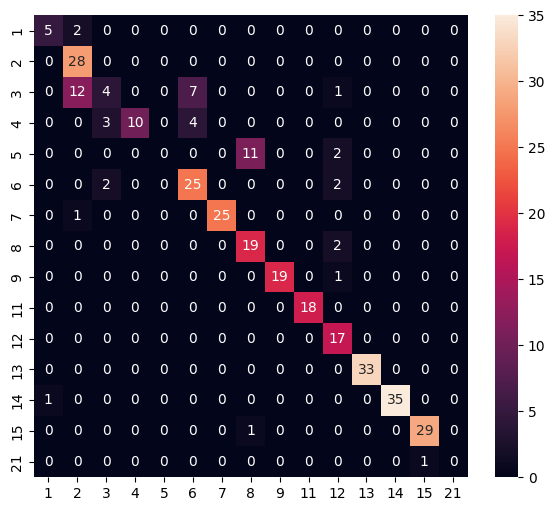

Classification Report
              precision    recall  f1-score   support

           1       0.83      0.71      0.77         7
           2       0.65      1.00      0.79        28
           3       0.44      0.17      0.24        24
           4       1.00      0.59      0.74        17
           5       0.00      0.00      0.00        13
           6       0.69      0.86      0.77        29
           7       1.00      0.96      0.98        26
           8       0.61      0.90      0.73        21
           9       1.00      0.95      0.97        20
          11       1.00      1.00      1.00        18
          12       0.68      1.00      0.81        17
          13       1.00      1.00      1.00        33
          14       1.00      0.97      0.99        36
          15       0.97      0.97      0.97        30
          21       0.00      0.00      0.00         1

    accuracy                           0.83       320
   macro avg       0.73      0.74      0.72       320
weig

/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `

In [180]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [181]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [182]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/tmplhq2zthd/assets


INFO:tensorflow:Assets written to: /var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/tmplhq2zthd/assets


Saved artifact at '/var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/tmplhq2zthd'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_9')
Output Type:
  TensorSpec(shape=(None, 37), dtype=tf.float32, name=None)
Captures:
  13464504656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13464504464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13464502928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13464511184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13464503504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13464506576: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1768681271.747744  381474 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1768681271.747762  381474 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2026-01-17 13:21:11.747853: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/tmplhq2zthd
2026-01-17 13:21:11.748187: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2026-01-17 13:21:11.748194: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/tmplhq2zthd
2026-01-17 13:21:11.750837: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2026-01-17 13:21:11.765150: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/tmplhq2zthd
2026-01-17 13:21:11.770068: I tensorflow/cc/saved_model/loader.cc:

8040

# Inference test

In [183]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [184]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [185]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [186]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 47 μs, sys: 18 μs, total: 65 μs
Wall time: 66 μs


In [187]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[6.31576236e-10 6.07837355e-05 1.88365419e-04 7.35259149e-04
 1.07479784e-04 1.74498520e-04 4.96497596e-05 1.93949927e-05
 2.01270985e-03 4.49505023e-06 3.19736208e-12 2.15680540e-01
 3.11432849e-03 8.81714653e-03 7.87650142e-03 7.61158764e-01
 2.64536414e-11 7.84099730e-11 2.38990425e-12 5.40166072e-11
 1.39831497e-11 1.85085940e-11 3.05772269e-10 1.72362014e-09
 1.41829604e-12 2.90548054e-11 2.47140308e-09 1.98980818e-10
 1.34316724e-11 4.18692338e-12 2.56521605e-12 1.30784524e-11
 4.94224765e-11 2.45774151e-10 1.99668840e-11 3.40973604e-11
 2.05021555e-11]
15
